# **Como prever possíveis churners?**


Uma das possibilidades fornecidas pelas técnicas de machine learning é a resolução de problemas de classificao, ou seja, situações em que precisamos saber, por exemplo, se um evento irá ocorrer ou não. Como exemplos podemos citar algoritmo que prevê se uma pessoa está acometida de alguma doença ou não, se um e-mail é spam ou não, se uma transação financeira é legítima, e, também podemos prever se um cliente irá deixar um banco ou não, que é o problema a ser trabalhado nesse projeto.

Visando trabalhar com esse tipo de ferramenta, baixei uma base de dados disponibilizada no kaggle na qual temos diversas características de clientes de um banco, bem como a informação se ele é um cliente existente ou se deixou o banco. 

Dessa forma, nesse projeto viso criar um modelo que seja capaz de definir, a priori, quais clientes podem abandonar o banco, que, ciente disso, poderia então criar estratégias para entrar em contato com tais clientes visando mantê-los no banco.



## Primeiro Passo

Naturalmente, o primeiro passo será importar as bibliotecas necessárias para leitura e manuseio dos dados. Além disso, já irei instalar a biblioteca feature-engine, que irá ser fundamental mais na frente quando formos trabalhar com Machine Learning.

Feito a importação, criaremos um dataframe que irá ter os dados baixados do kaggle.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install feature-engine

     |████████████████████████████████| 9.5MB 8.6MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/projetos_pessoais/BankChurners.csv')

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## Análise Exploratória de Dados

Após chamar a base de dados, é necessário que analisemos a fundo as características principais destes dados. Mesmo que nosso objetivo final não seja a Análise Exploratória, faz-se necessário que conheçamos bem as informações que tais dados têm a nos oferecer. Ou seja, podemos extrair insights a partir de uma boa análise de dados.





1. A partir do código abaixo, percebemos que 83.9% da nossa base é composta por clientes existentes. Por sua vez, 16% é de clientes que abandonaram.

In [ ]:
df.Attrition_Flag.value_counts(1)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

**2.** Uma das colunas presentes em nosso DataFrame diz respeito ao nível educacional do cliente. Abaixo, podemos verificar a distribuição dos clientes face ao seu respectivo nível educacional. 

 1. A grande maioria dos clientes são graduados, e em seguida, temos muitos clientes com ensino médio completo.
 2. Também temos muito clientes com informação desconhecida (Unknow)
 3. Por fim, temos poucos clientes com cursos de pós-graduação e doutorado.

In [ ]:
df.Education_Level.value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

**3.** Uma outra informação disponibilizada na base de dados diz respeito à categoria de renda do cliente.
  1. Nesse ponto, a grande maioria possui renda inferior à 40 mil por ano.

In [ ]:
df.Income_Category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

**4.** Ademais, os clientes são separados em Blue, Silver, Gold e Platinum.

   1. Clientes Platinum são apenas 20 em 10127, enquanto que os clientes blue são 9436 em 10127 (isto é, 93% da base).

In [ ]:
print('Valores Percentuais:')
print(df.Card_Category.value_counts(1))
print()
print('Valores Absolutos: ')
print(df.Card_Category.value_counts())
print()
print('Tamanho da base: ')
print(df.shape[0])

Valores Percentuais:
Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: Card_Category, dtype: float64

Valores Absolutos: 
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

Tamanho da base: 
10127


**5.** A partir do código abaixo, pode-se perceber que não temos valores faltantes em nossa base de dados.

In [ ]:
df.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

**6.** Visando entender melhor a distribuição das idades em relação ao nível educacional, foi feito o seguinte boxplot.

   1. É perceptível que as distribuições de nível de escolaridade são similares, independentemente da faixa etária. Por exemplo, os valores medianos para ensino médio, graduação, college, sem educação são aparentemente iguais (aproximadamente 47 anos). Por sua vez, era de se esperar um pequeno aumento em relação aos clientes que possuem pós-graduação ou doutorado, nas quais a idade é um pouco superior. 
   2. É curioso notar que os que não possuem informação sobre nível educacional possuem uma distribuição etária ligeiramente mais alta. 

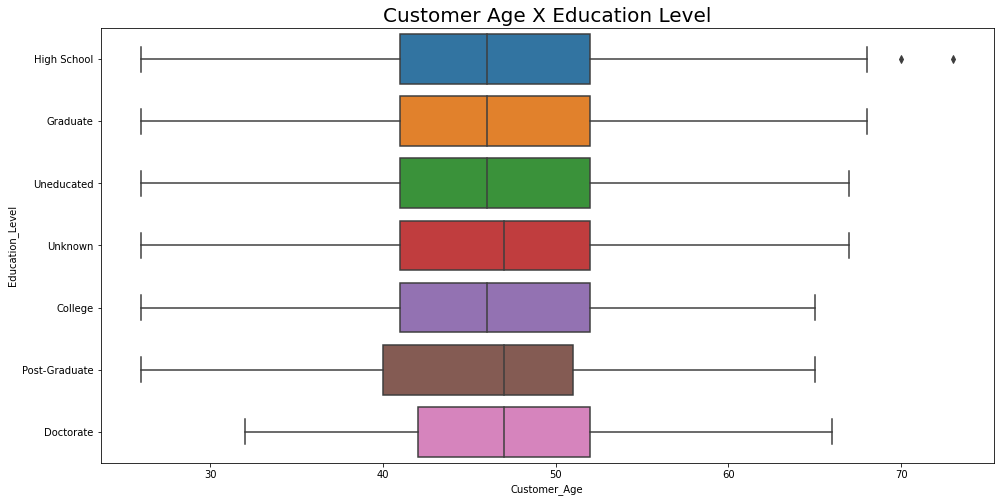

In [ ]:
fig, ax = plt.subplots(1,1, figsize= (16, 8))

sns.boxplot(x = 'Customer_Age', y = 'Education_Level', data = df, orient= 'h', ax = ax).set_title('Customer Age X Education Level', fontsize = 20);

**7.** Para melhor compreender a variável nível educacional, realizei um agrupamento por nível de escolaridade e fiz uma média e mediana do limite de crédito. Meu objetivo era verificar se dependendo do nível educacional, poderíamos ter créditos maiores ou menores. Porém, não foi algo notado, visto que todas as medianas estão próximas. As médias estão mais altas por causa de valores extremos que estão distorcendo seu valor, ainda assim, a média se mantém homogênea em todos os níveis educacionais.

In [ ]:
(df
    .groupby('Education_Level')
    .agg({'Credit_Limit': ['mean', 'median']})
)

Credit_Limit        
                        mean  median
Education_Level                     
College          8684.536130  4489.0
Doctorate        8413.258980  4480.0
Graduate         8566.100927  4607.5
High School      8605.823547  4546.0
Post-Graduate    8862.560465  4473.0
Uneducated       8899.509011  4654.0
Unknown          8491.798947  4411.0

**7.1** Nesse gráfico, podemos visualizar melhor o que estava na tabela acima. Nos boxplots, fica claro o efeito dos outliers afetando a média. Também, podemos verificar como são distribuição similares. O que mais varia são os extremos. A quantidade de outliers para ensino médio e graduação é consideravelemnte alta. Por sua vez, o limite superior para os que não possuem ensino é o maior limite.

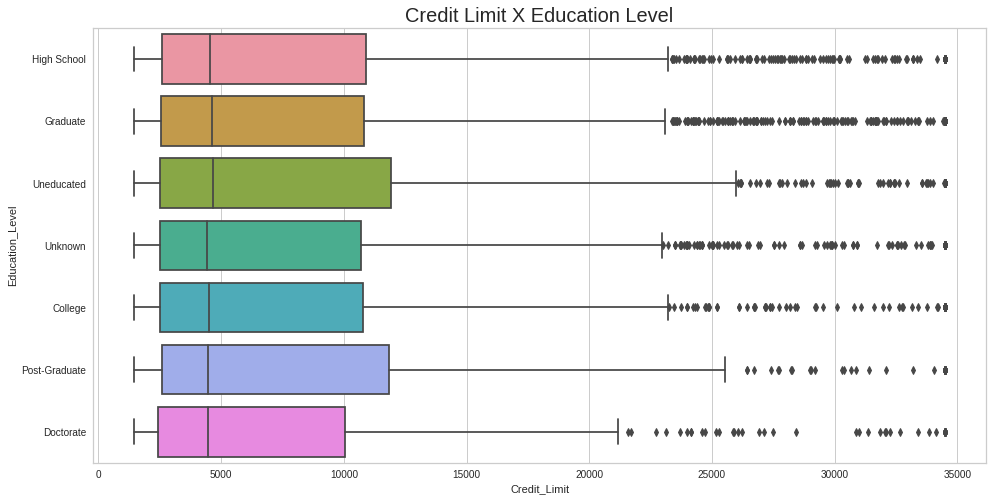

In [ ]:
fig, ax = plt.subplots(1,1, figsize= (16, 8))

sns.boxplot(x = 'Credit_Limit', y = 'Education_Level', data = df, orient= 'h', ax = ax).set_title('Credit Limit X Education Level', fontsize = 20);

In [ ]:
(df
    .groupby('Income_Category')
    .agg(
        {'Credit_Limit': 'mean'}
    )
)

,Credit_Limit
Income_Category,
$120K +,19717.322558
$40K - $60K,5462.259832
$60K - $80K,10758.772967
$80K - $120K,15809.890945
Less than $40K,3754.404521
Unknown,9516.582464


**7.2** Acima, foi feito um agrupamento dos clientes pelo nível de receita, calculando a média de cada agrupamento de receita. A partir disso, foi feito o gráfico abaixo em que podemos perceber quais grupos possuem maiores médias de limite de crédito. A maior mediana é do grupo dos que recebem mais de 120 mil ao ano, logo abaixo temos a faixa que varia entre 80 e 120 mil ao ano. Ou seja, há uma possível relação entre limite de crédito e sua renda anual.

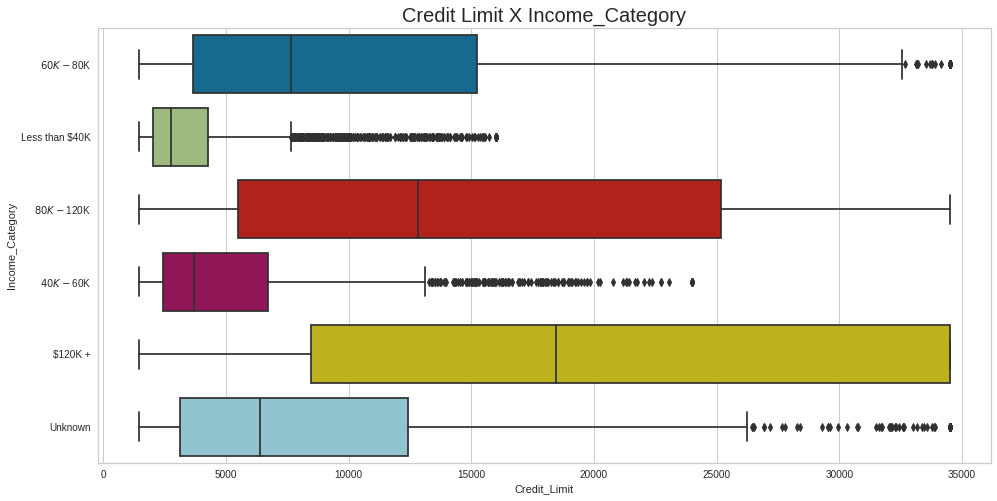

In [ ]:
fig, ax = plt.subplots(1,1, figsize= (16, 8))

sns.boxplot(x = 'Credit_Limit', y = 'Income_Category', data = df, orient= 'h', ax = ax).set_title('Credit Limit X Income_Category', fontsize = 20);

In [ ]:
df.Income_Category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [ ]:
def transformar_em_num(value):
    if value == 'Less than $40K':
        return 1
    elif value == '$40K - $60K':
        return 2
    elif value == '$80K - $120K':
        return 4
    elif value == '$60K - $80K':
        return 3
    elif value == 'Unknown':
        return 0
    else:
        return 5


In [ ]:
df['num_income_category'] = df['Income_Category'].apply(transformar_em_num)
df[['num_income_category', 'Income_Category']].head()

,num_income_category,Income_Category
0,3,$60K - $80K
1,1,Less than $40K
2,4,$80K - $120K
3,1,Less than $40K
4,3,$60K - $80K


**8** Agora, a partir do gráfico abaixo podemos analisar a relação entre mais tempo no banco e maiores créditos a luz de duas variáveis: nível educacional, faixa de renda. Em relação à primeira variável (educação) não conseguimos perceber um padrão, porém, ainda pode-se identificar no gráfico à direita que os pontos mais escuros (os que tem maiores faixas de renda) estão mais na direita do Eixo X (limite de crédito), isto é, possuem maiores limites.

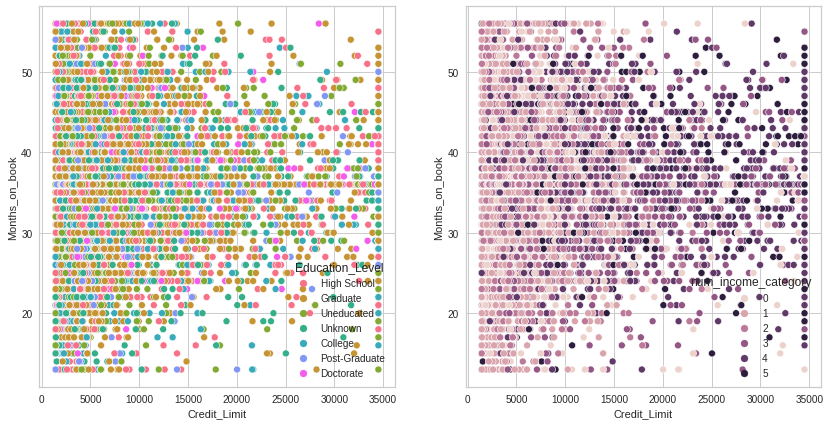

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (14,7))

sns.scatterplot(x = 'Credit_Limit', y = 'Months_on_book', data = df, hue = 'Education_Level', ax = axes[0])
sns.scatterplot(x = 'Credit_Limit', y = 'Months_on_book', data = df, hue = 'num_income_category', ax = axes[1])



---

---





**9** Abaixo iremos retirar duas colunas que não serão utilizadas, bem como criaremos a coluna numérica contendo a informação se o cliente é churn ou não.

In [ ]:
df.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
def get_churn(coluna):
    if coluna == 'Existing Customer':
        return 0
    else:
        return 1

df['churn'] = df.Attrition_Flag.apply(get_churn)

In [ ]:
df_2 = df.drop(labels = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
                         axis = 1).copy()

**10** Com o gráfico abaixo, é possível identificar os níveis de correlação das variáveis. Olhando especificamente para a variável target (Churn), não é possível identificar nenhuma correlação forte. Entre as features, é possível identificar algumas variáveis com níveis de correlação mais fortes, o que não é necessariamente positivo pois pode implicar em multicolinearidade.

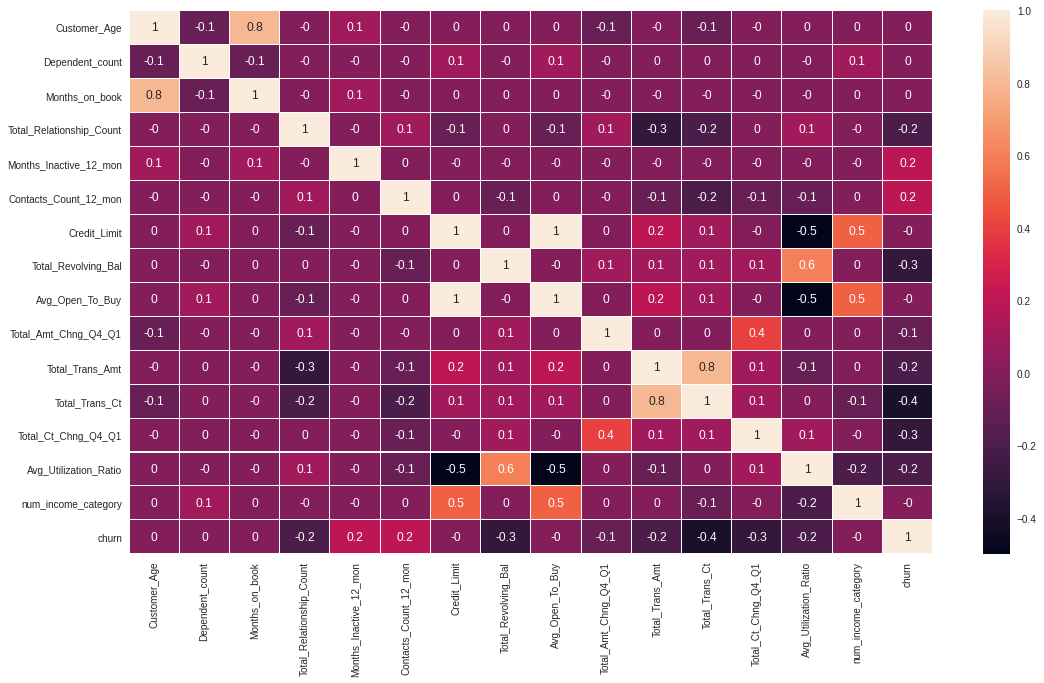

In [ ]:
plt.figure(figsize = (18,10))

sns.heatmap(round(df_2.drop('CLIENTNUM', axis = 1).corr(), 1), annot = True, lw = 0.05);



---

---




**Feita essa análise dos dados, partiremos para aplicação de métodos de machine learning para resolução do problema proposto!!**

# Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

## Criação da Analytical Base Table (ABT)

Será nesse dataframe que iremos aplicar os métodos de machine learning.
* Somente serão realizados dois procedimentos:
        1.Criar a coluna que irá conter 0 para Existing Customer e 1  para Attrition Customer.
        2. Filtrar as colunas que serão utilizadas futuramente 

In [ ]:
abt = (
    df
    .assign(churn = lambda df: np.where(df['Attrition_Flag'] == 'Existing Customer', 0, 1))
    .filter(['Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'churn'])
    .copy()
)

In [ ]:
abt.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,churn
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


No código abaixo, irei separar minha variáveis numéricas e categóricas (o que facilitará na parte de feature engineering. Além disso, já estou criando minha base de treino e de teste

In [ ]:
cat_vars = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
num_vars = ['Customer_Age', 'Dependent_count', 'Months_on_book',	'Total_Relationship_Count',
            'Months_Inactive_12_mon',	'Contacts_Count_12_mon',	'Credit_Limit',	'Total_Revolving_Bal',
            'Avg_Open_To_Buy',	'Total_Amt_Chng_Q4_Q1',	'Total_Trans_Amt',	'Total_Trans_Ct',	'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio' ]
modeling_vars = cat_vars + num_vars

X = abt[modeling_vars].copy()
y = abt.churn.copy()

X, X_test, y, y_test = train_test_split(X,y, stratify = y, test_size = 0.2)

In [ ]:
print(X.shape, y.shape)
print(X_test.shape, y_test.shape)

(8101, 19) (8101,)
(2026, 19) (2026,)


Então, irei criar um DataFrame que irá conter as métricas dos diferentes algoritmos. A partir desse DataFrame poderemos escolher o algoritmo que obteve melhor resultado e então trabalhar em seus hiperparâmetros para que possamos ter uma melhora no resultado.

**Sobre as métricas abaixo:**

Para compreender as métricas de classificação, é necessário ter em mente a tabela de confusão:

<img src=https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg width="500"/>

- TP: True Positive
- TN: True Negative
- FP: False Positive
- FN: False Negative



**1. Acurácia**: é a soma dos verdadeiros (verdadeiro positivo + verdadeiros negativo) dividido pelo total. Com isso, podemos ter uma visão geral de quanto o modelo está acertando. Porém, não é uma métrica muito interessante quando temos uma base de dados desbalanceada.

        Fórmula: 
        (TN + TP)/(TP + TN + FP + FN) 

**2. Precisão**: porcentagem de acerto do modelo em relação a tudo que ele calculou como positivo
        
        Fórmula:
        TP / (FP + TP)


**3. Recall**: porcentagem de acerto (de verdadeiros positivos) em relação a tudo que deveria ser positivo. 
        
        Fórmula:
        TP / (TP + FN)

**4. F1**: é uma junção do recall e da precisão.

        Fórmula:
        2 * Precisão * Recall / Precisão + Recall

**5. AUC Score**: AUC é uma métrica que resume a curva ROC, a qual mede a relação entre dois paramêtros: taxa de verdadeiros positivos, taxa de falso positivo. 

*Link para melhor compreensão:* 

https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772

https://medium.com/@vilsonrodrigues/machine-learning-o-que-s%C3%A3o-acurracy-precision-recall-e-f1-score-f16762f165b0

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

todas_metricas = {
    'modelo': [],
    'acuracidade': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'auc': [],
}

In [ ]:
#!pip install feature-engine

In [ ]:
# etapas de features engineering
from feature_engine.categorical_encoders import OneHotCategoricalEncoder # Criar variaveis dummies
from feature_engine.missing_data_imputers import CategoricalVariableImputer # Imputar valores missing quando for variavel categorica
from feature_engine.missing_data_imputers import ArbitraryNumberImputer # Imputar valores quando for variavel numerica
from feature_engine.wrappers import SklearnTransformerWrapper # Normalizar
from sklearn.preprocessing import StandardScaler

# Modelos de machine learning para classificacao
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

## Pipeline de Feature Engineering com Regressao Logistica


In [ ]:
# Mesmo nao tendo valores nulos, criei um step de tratamento de missing
lr = Pipeline(steps = [
                             ('numeric_imputer', ArbitraryNumberImputer(variables= num_vars, arbitrary_number= -999)),
                             ('categoric_imputer', CategoricalVariableImputer(variables=cat_vars, return_object=True)),
                             ('normalizacao', SklearnTransformerWrapper(variables = num_vars, transformer= StandardScaler())),
                             ('categoricos', OneHotCategoricalEncoder(variables = cat_vars)),
                             ('regressao_logistica', LogisticRegression(random_state=42))
])


lr.fit(X, y)

y_predict = lr.predict(X_test)
y_esperado = y_test
y_prob = lr.predict_proba(X_test)

# Populando o dataframe com os valores das metricas

todas_metricas['modelo'].append('Logistic Regression')
todas_metricas['acuracidade'].append(accuracy_score(y_esperado, y_predict))
todas_metricas['precision'].append(precision_score(y_esperado, y_predict))
todas_metricas['recall'].append(recall_score(y_esperado, y_predict))
todas_metricas['f1'].append(f1_score(y_esperado, y_predict))
todas_metricas['auc'].append(roc_auc_score(y_esperado, y_prob[:,1]))

pd.DataFrame(todas_metricas)

,modelo,acuracidade,precision,recall,f1,auc
0,Logistic Regression,0.914610,0.814050,0.606154,0.694885,0.927255
1,Decision Tree,0.936328,0.812102,0.784615,0.798122,0.874965
2,SVC,0.935341,0.839161,0.738462,0.785597,0.966157
3,Logistic Regression,0.914610,0.814050,0.606154,0.694885,0.927255
4,Decision Tree,0.938302,0.826797,0.778462,0.801902,0.873652
5,SVC,0.935341,0.839161,0.738462,0.785597,0.966159
6,rf,0.956565,0.930909,0.787692,0.853333,0.990159
7,gradient_boost,0.967917,0.951389,0.843077,0.893964,0.991370
8,xgboost,0.969891,0.955172,0.852308,0.900813,0.992799
9,lgbm,0.976308,0.945338,0.904615,0.924528,0.993938


## Pipeline de Feature Engineering com Decision Tree




In [ ]:
# Modelos de arvores nao necessitam de normalizacao
dt = Pipeline(steps = [
                             ('numeric_imputer', ArbitraryNumberImputer(variables= num_vars, arbitrary_number= -999)),
                             ('categoric_imputer', CategoricalVariableImputer(variables=cat_vars, return_object=True)),
                             ('categoricos', OneHotCategoricalEncoder(variables = cat_vars)),
                             ('decision_tree', DecisionTreeClassifier(random_state=42))
])


dt.fit(X, y)

y_predict = dt.predict(X_test)
y_esperado = y_test
y_prob = dt.predict_proba(X_test)

# Populando o dataframe com os valores das metricas

todas_metricas['modelo'].append('Decision Tree')
todas_metricas['acuracidade'].append(accuracy_score(y_esperado, y_predict))
todas_metricas['precision'].append(precision_score(y_esperado, y_predict))
todas_metricas['recall'].append(recall_score(y_esperado, y_predict))
todas_metricas['f1'].append(f1_score(y_esperado, y_predict))
todas_metricas['auc'].append(roc_auc_score(y_esperado, y_prob[:,1]))

pd.DataFrame(todas_metricas)

,modelo,acuracidade,precision,recall,f1,auc
0,Logistic Regression,0.914610,0.814050,0.606154,0.694885,0.927255
1,Decision Tree,0.936328,0.812102,0.784615,0.798122,0.874965
2,SVC,0.935341,0.839161,0.738462,0.785597,0.966157
3,Logistic Regression,0.914610,0.814050,0.606154,0.694885,0.927255
4,Decision Tree,0.938302,0.826797,0.778462,0.801902,0.873652
5,SVC,0.935341,0.839161,0.738462,0.785597,0.966159
6,rf,0.956565,0.930909,0.787692,0.853333,0.990159
7,gradient_boost,0.967917,0.951389,0.843077,0.893964,0.991370
8,xgboost,0.969891,0.955172,0.852308,0.900813,0.992799
9,lgbm,0.976308,0.945338,0.904615,0.924528,0.993938


## Pipeline de Feature Engineering com Support Vector Machine




In [ ]:
svc = Pipeline(steps = [
                             ('numeric_imputer', ArbitraryNumberImputer(variables= num_vars, arbitrary_number= -999)),
                             ('categoric_imputer', CategoricalVariableImputer(variables=cat_vars, return_object=True)),
                        ('numeric_scaler', SklearnTransformerWrapper(variables=num_vars, transformer=StandardScaler())),
                             ('categoricos', OneHotCategoricalEncoder(variables = cat_vars)),
                             ('SVC', SVC(C=10, probability= True,random_state=42))
])


svc.fit(X, y)

y_predict = svc.predict(X_test)
y_esperado = y_test
y_prob = svc.predict_proba(X_test)

todas_metricas['modelo'].append('SVC')
todas_metricas['acuracidade'].append(accuracy_score(y_esperado, y_predict))
todas_metricas['precision'].append(precision_score(y_esperado, y_predict))
todas_metricas['recall'].append(recall_score(y_esperado, y_predict))
todas_metricas['f1'].append(f1_score(y_esperado, y_predict))
todas_metricas['auc'].append(roc_auc_score(y_esperado, y_prob[:,1]))

pd.DataFrame(todas_metricas)

,modelo,acuracidade,precision,recall,f1,auc
0,Logistic Regression,0.914610,0.814050,0.606154,0.694885,0.927255
1,Decision Tree,0.936328,0.812102,0.784615,0.798122,0.874965
2,SVC,0.935341,0.839161,0.738462,0.785597,0.966157
3,Logistic Regression,0.914610,0.814050,0.606154,0.694885,0.927255
4,Decision Tree,0.938302,0.826797,0.778462,0.801902,0.873652
5,SVC,0.935341,0.839161,0.738462,0.785597,0.966159
6,rf,0.956565,0.930909,0.787692,0.853333,0.990159
7,gradient_boost,0.967917,0.951389,0.843077,0.893964,0.991370
8,xgboost,0.969891,0.955172,0.852308,0.900813,0.992799
9,lgbm,0.976308,0.945338,0.904615,0.924528,0.993938


## Pipeline de Feature Engineering com Random Forest

In [ ]:
rf = Pipeline(steps = [
                             ('numeric_imputer', ArbitraryNumberImputer(variables= num_vars, arbitrary_number= -999)),
                             ('categoric_imputer', CategoricalVariableImputer(variables=cat_vars, return_object=True)),
                        ('numeric_scaler', SklearnTransformerWrapper(variables=num_vars, transformer=StandardScaler())),
                             ('categoricos', OneHotCategoricalEncoder(variables = cat_vars)),
                             ('rf', RandomForestClassifier(random_state=42))
])


rf.fit(X, y)

y_predict = rf.predict(X_test)
y_esperado = y_test
y_prob = rf.predict_proba(X_test)

todas_metricas['modelo'].append('rf')
todas_metricas['acuracidade'].append(accuracy_score(y_esperado, y_predict))
todas_metricas['precision'].append(precision_score(y_esperado, y_predict))
todas_metricas['recall'].append(recall_score(y_esperado, y_predict))
todas_metricas['f1'].append(f1_score(y_esperado, y_predict))
todas_metricas['auc'].append(roc_auc_score(y_esperado, y_prob[:,1]))

pd.DataFrame(todas_metricas)

,modelo,acuracidade,precision,recall,f1,auc
0,Logistic Regression,0.914610,0.814050,0.606154,0.694885,0.927255
1,Decision Tree,0.936328,0.812102,0.784615,0.798122,0.874965
2,SVC,0.935341,0.839161,0.738462,0.785597,0.966157
3,Logistic Regression,0.914610,0.814050,0.606154,0.694885,0.927255
4,Decision Tree,0.938302,0.826797,0.778462,0.801902,0.873652
5,SVC,0.935341,0.839161,0.738462,0.785597,0.966159
6,rf,0.956565,0.930909,0.787692,0.853333,0.990159
7,gradient_boost,0.967917,0.951389,0.843077,0.893964,0.991370
8,xgboost,0.969891,0.955172,0.852308,0.900813,0.992799
9,lgbm,0.976308,0.945338,0.904615,0.924528,0.993938


## Pipeline de Feature Engineering com Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gboost = Pipeline(steps = [
                             ('numeric_imputer', ArbitraryNumberImputer(variables= num_vars, arbitrary_number= -999)),
                             ('categoric_imputer', CategoricalVariableImputer(variables=cat_vars, return_object=True)),
                        ('numeric_scaler', SklearnTransformerWrapper(variables=num_vars, transformer=StandardScaler())),
                             ('categoricos', OneHotCategoricalEncoder(variables = cat_vars)),
                             ('gradient_boost', GradientBoostingClassifier(random_state=42))
])


gboost.fit(X, y)

y_predict = gboost.predict(X_test)
y_esperado = y_test
y_prob = gboost.predict_proba(X_test)

todas_metricas['modelo'].append('gradient_boost')
todas_metricas['acuracidade'].append(accuracy_score(y_esperado, y_predict))
todas_metricas['precision'].append(precision_score(y_esperado, y_predict))
todas_metricas['recall'].append(recall_score(y_esperado, y_predict))
todas_metricas['f1'].append(f1_score(y_esperado, y_predict))
todas_metricas['auc'].append(roc_auc_score(y_esperado, y_prob[:,1]))

pd.DataFrame(todas_metricas)

,modelo,acuracidade,precision,recall,f1,auc
0,Logistic Regression,0.914610,0.814050,0.606154,0.694885,0.927255
1,Decision Tree,0.936328,0.812102,0.784615,0.798122,0.874965
2,SVC,0.935341,0.839161,0.738462,0.785597,0.966157
3,Logistic Regression,0.914610,0.814050,0.606154,0.694885,0.927255
4,Decision Tree,0.938302,0.826797,0.778462,0.801902,0.873652
5,SVC,0.935341,0.839161,0.738462,0.785597,0.966159
6,rf,0.956565,0.930909,0.787692,0.853333,0.990159
7,gradient_boost,0.967917,0.951389,0.843077,0.893964,0.991370
8,xgboost,0.969891,0.955172,0.852308,0.900813,0.992799
9,lgbm,0.976308,0.945338,0.904615,0.924528,0.993938


## Pipeline de Feature Engineering com XGBoost

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

xgboost = Pipeline(steps = [
                             ('numeric_imputer', ArbitraryNumberImputer(variables= num_vars, arbitrary_number= -999)),
                             ('categoric_imputer', CategoricalVariableImputer(variables=cat_vars, return_object=True)),
                        ('numeric_scaler', SklearnTransformerWrapper(variables=num_vars, transformer=StandardScaler())),
                             ('categoricos', OneHotCategoricalEncoder(variables = cat_vars)),
                             ('xgb', XGBClassifier(random_state=42))
])


xgboost.fit(X, y)

y_predict = xgboost.predict(X_test)
y_esperado = y_test
y_prob = xgboost.predict_proba(X_test)

todas_metricas['modelo'].append('xgboost')
todas_metricas['acuracidade'].append(accuracy_score(y_esperado, y_predict))
todas_metricas['precision'].append(precision_score(y_esperado, y_predict))
todas_metricas['recall'].append(recall_score(y_esperado, y_predict))
todas_metricas['f1'].append(f1_score(y_esperado, y_predict))
todas_metricas['auc'].append(roc_auc_score(y_esperado, y_prob[:,1]))

pd.DataFrame(todas_metricas)

,modelo,acuracidade,precision,recall,f1,auc
0,Logistic Regression,0.914610,0.814050,0.606154,0.694885,0.927255
1,Decision Tree,0.936328,0.812102,0.784615,0.798122,0.874965
2,SVC,0.935341,0.839161,0.738462,0.785597,0.966157
3,Logistic Regression,0.914610,0.814050,0.606154,0.694885,0.927255
4,Decision Tree,0.938302,0.826797,0.778462,0.801902,0.873652
5,SVC,0.935341,0.839161,0.738462,0.785597,0.966159
6,rf,0.956565,0.930909,0.787692,0.853333,0.990159
7,gradient_boost,0.967917,0.951389,0.843077,0.893964,0.991370
8,xgboost,0.969891,0.955172,0.852308,0.900813,0.992799
9,lgbm,0.976308,0.945338,0.904615,0.924528,0.993938


## Pipeline de Feature Engineering com LGBM

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

lgbm = Pipeline(steps = [
                             ('numeric_imputer', ArbitraryNumberImputer(variables= num_vars, arbitrary_number= -999)),
                             ('categoric_imputer', CategoricalVariableImputer(variables=cat_vars, return_object=True)),
                        ('numeric_scaler', SklearnTransformerWrapper(variables=num_vars, transformer=StandardScaler())),
                             ('categoricos', OneHotCategoricalEncoder(variables = cat_vars)),
                             ('lgbm', LGBMClassifier(random_state=42))
])


lgbm.fit(X, y)

y_predict = lgbm.predict(X_test)
y_esperado = y_test
y_prob = lgbm.predict_proba(X_test)

todas_metricas['modelo'].append('lgbm')
todas_metricas['acuracidade'].append(accuracy_score(y_esperado, y_predict))
todas_metricas['precision'].append(precision_score(y_esperado, y_predict))
todas_metricas['recall'].append(recall_score(y_esperado, y_predict))
todas_metricas['f1'].append(f1_score(y_esperado, y_predict))
todas_metricas['auc'].append(roc_auc_score(y_esperado, y_prob[:,1]))

pd.DataFrame(todas_metricas)

,modelo,acuracidade,precision,recall,f1,auc
0,Logistic Regression,0.914610,0.814050,0.606154,0.694885,0.927255
1,Decision Tree,0.936328,0.812102,0.784615,0.798122,0.874965
2,SVC,0.935341,0.839161,0.738462,0.785597,0.966157
3,Logistic Regression,0.914610,0.814050,0.606154,0.694885,0.927255
4,Decision Tree,0.938302,0.826797,0.778462,0.801902,0.873652
5,SVC,0.935341,0.839161,0.738462,0.785597,0.966159
6,rf,0.956565,0.930909,0.787692,0.853333,0.990159
7,gradient_boost,0.967917,0.951389,0.843077,0.893964,0.991370
8,xgboost,0.969891,0.955172,0.852308,0.900813,0.992799
9,lgbm,0.976308,0.945338,0.904615,0.924528,0.993938


A partir da tabela acima, podemos escolher o melhor modelo. Analisando as métricas em questão, tendo em mente que nosso problema é prever clientes que irão abandonar o banco, percebemos que o Recall do LGBM é muito alto (sendo essa a métrica mais importante pois me informa quanto que meu modelo consegue prever de clientes que serão churns). Além disso, os valores do precision, do f1 scores e da AUC score também são muito bons. Dessa forma, iremos selecionar o LGBM e trabalhar em seus hiperparâmetros para conseguir melhorar um pouco a acertividade do modelo.

## Cross Validation e Hiperparametros

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
X.head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10121,F,Graduate,Single,Less than $40K,Blue,56,1,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
8472,M,High School,Married,$80K - $120K,Blue,34,2,25,6,2,0,1439.0,0,1439.0,0.890,2932,44,0.913,0.000
3326,F,Graduate,Single,Unknown,Silver,43,4,36,4,3,4,34516.0,1893,32623.0,0.748,3639,76,1.000,0.055
6867,F,Unknown,Single,Less than $40K,Blue,43,4,33,3,3,1,2525.0,2217,308.0,0.763,4409,69,0.568,0.878
9707,F,Graduate,Married,Less than $40K,Blue,58,3,36,2,2,2,5023.0,1857,3166.0,0.631,14111,98,0.690,0.370


In [ ]:
y.head()

10121    0
8472     1
3326     0
6867     0
9707     0
Name: churn, dtype: int64

A fim de verificarmos a qualidade da nossa base de treino, iremos dividi-la em 5 partes, nas quais teremos treino e validação. 

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=666961)

cv_results = cross_val_score(estimator=lgbm, X=X[modeling_vars], y=y, scoring='recall', cv=kf, n_jobs=-1)

Abaixo temos os valores, utilizando a metrica Recall, dos 5 folds. Podemos perceber que nao ha grandes variacoes nos valores, o que indica uma boa base de treino

In [ ]:
cv_results

array([0.89015152, 0.89873418, 0.87698413, 0.86046512, 0.89347079])

In [ ]:
lgbm.fit(X, y)

Pipeline(memory=None,
         steps=[('numeric_imputer',
                 ArbitraryNumberImputer(arbitrary_number=-999,
                                        imputer_dict=None,
                                        variables=['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                          

In [ ]:
y_pred = lgbm.predict(X_test)

print(recall_score(y_test, y_pred))

0.9046153846153846


**Tabela de Confusao**

Da mesma forma que colocamos uma imagem acima com uma tabela de confusao explicando os seus valores, abaixo plotamos a mesma tabela porem com o modelo utilizado.

Em preto, temos os erros. Assim, podemos perceber que o modelo acertou cerca de 90% dos clientes que deveriam sair (294 de 325), sendo este nosso recall. Alem disso, dos 311 (294 + 17) clientes que o modelo previu que seriam churn, ele acertou em 294 casos, que a nossa precisao.

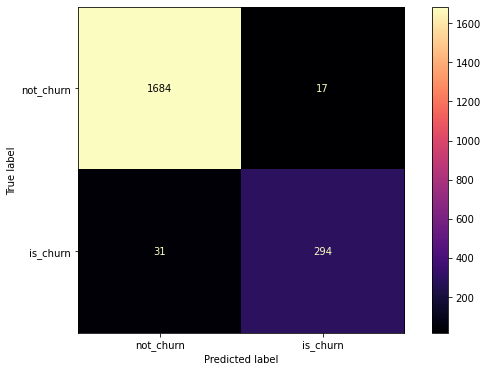

In [ ]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(1, 1, figsize = (10,6))

plot_confusion_matrix(lgbm, X_test, y_test, values_format='d', display_labels=['not_churn', 'is_churn'], ax = ax, cmap = 'magma');

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

parametros = {
    'lgbm__learning_rate': [0.01, 0.05, 0.1], # [0.01, 0.015, 0.025, 0.05, 0.1],
    'lgbm__n_estimators': [500, 2000, 10000], # [500, 1000, 2000, 5000, 10000],
    'lgbm__max_depth': [3, 12, 25], # [3, 5, 7, 9, 12, 15, 17, 25],
    'lgbm__colsample_bytree': [0.6, 0.8, 1.0], # [0.6, 0.7, 0.8, 0.9, 1.0],
    'lgbm__subsample': [0.6, 0.8, 1.0], # [0.6, 0.7, 0.8, 0.9, 1.0],
    'lgbm__class_weight': ['balanced', None],
}

random_search = RandomizedSearchCV(lgbm, parametros, scoring='recall', cv=kf, n_iter = 30, n_jobs=-1, random_state= 42)



In [ ]:
random_search.fit(X, y)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=666961, shuffle=True),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('numeric_imputer',
                                              ArbitraryNumberImputer(arbitrary_number=-999,
                                                                     imputer_dict=None,
                                                                     variables=['Customer_Age',
                                                                                'Dependent_count',
                                                                                'Months_on_book',
                                                                                'Total_Relationship_Count',
                                                                                'Months_Inactive_12_mon',
                                                                                'Cont

In [ ]:
random_search.best_params_

{'lgbm__class_weight': 'balanced',
 'lgbm__colsample_bytree': 0.8,
 'lgbm__learning_rate': 0.01,
 'lgbm__max_depth': 3,
 'lgbm__n_estimators': 2000,
 'lgbm__subsample': 0.6}

In [ ]:
best_model_random = random_search.best_estimator_
best_model_random.fit(X, y)

y_predito_train = best_model_random.predict(X)
y_predito_test = best_model_random.predict(X_test)

y_esperado_train = y
y_esperado_test = y_test

print('Recall para base de treino: ', recall_score(y_esperado_train, y_predito_train))
print('Recall para base de teste: ', recall_score(y_esperado_test, y_predito_test))

Recall para base de treino:  0.989247311827957
Recall para base de teste:  0.9661538461538461


In [ ]:
y_predito_test = best_model_random.predict(X_test)
y_esperado_test = y_test

y_prob = best_model_random.predict_proba(X_test)

todas_metricas['modelo'].append('lgbm - hiperparametros')
todas_metricas['acuracidade'].append(accuracy_score(y_esperado_test, y_predito_test))
todas_metricas['precision'].append(precision_score(y_esperado_test, y_predito_test))
todas_metricas['recall'].append(recall_score(y_esperado_test, y_predito_test))
todas_metricas['f1'].append(f1_score(y_esperado_test, y_predito_test))
todas_metricas['auc'].append(roc_auc_score(y_esperado_test, y_prob[:,1]))

pd.DataFrame(todas_metricas)

,modelo,acuracidade,precision,recall,f1,auc
0,Logistic Regression,0.914610,0.814050,0.606154,0.694885,0.927255
1,Decision Tree,0.936328,0.812102,0.784615,0.798122,0.874965
2,SVC,0.935341,0.839161,0.738462,0.785597,0.966157
3,Logistic Regression,0.914610,0.814050,0.606154,0.694885,0.927255
4,Decision Tree,0.938302,0.826797,0.778462,0.801902,0.873652
5,SVC,0.935341,0.839161,0.738462,0.785597,0.966159
6,rf,0.956565,0.930909,0.787692,0.853333,0.990159
7,gradient_boost,0.967917,0.951389,0.843077,0.893964,0.991370
8,xgboost,0.969891,0.955172,0.852308,0.900813,0.992799
9,lgbm,0.976308,0.945338,0.904615,0.924528,0.993938


Comparando as duas Tabelas de Confusao, podemos perceber uma melhora consideravel em relacao aos True Positive (saindo de 294 e indo para 314), ou seja, o modelo consegue prever melhor quem vai de fato sair. Porem, tambem percebemos uma piora na nossa precisao. Antes o modelo previa 17 clientes que seriam churns, mas nao eram. Agora, o modelou previu 68 clientes, identificando como churns, mas que na realidade nao eram. Isso pode ser prejudicial a area de negocio quando for implementar estrategias de retencao de clientes, visto que ira gastar com esses 68 clientes que deveriam sair (de acordo com o modelo), mas que nao iriam sair. Contudo, ainda temos uma alta precisao (82%), e temos um excelente Recall (de 96%).

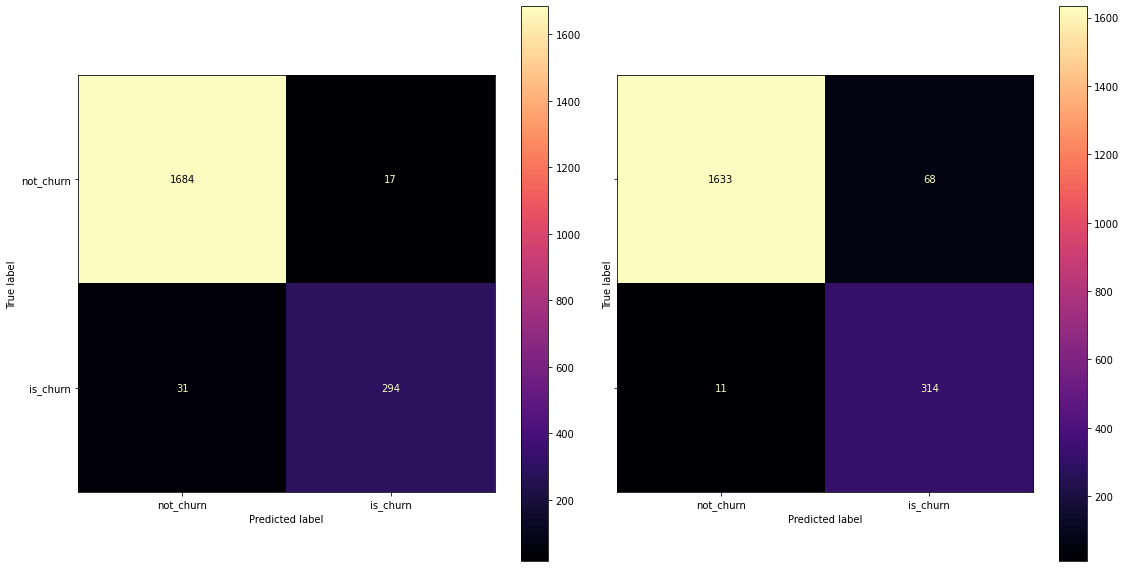

In [ ]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(1, 2, figsize = (16,8), sharey=True)

plot_confusion_matrix(lgbm, X_test, y_test, values_format='d', display_labels=['not_churn', 'is_churn'], ax = ax[0], cmap = 'magma');
plot_confusion_matrix(best_model_random, X_test, y_test, values_format='d', display_labels=['not_churn', 'is_churn'], ax = ax[1], cmap = 'magma')

plt.tight_layout();

No grafico abaixo, podemos verificar as 10 variaveis mais relevantes para o modelo. Sendo a mais relevante a Total_trans_Amt.

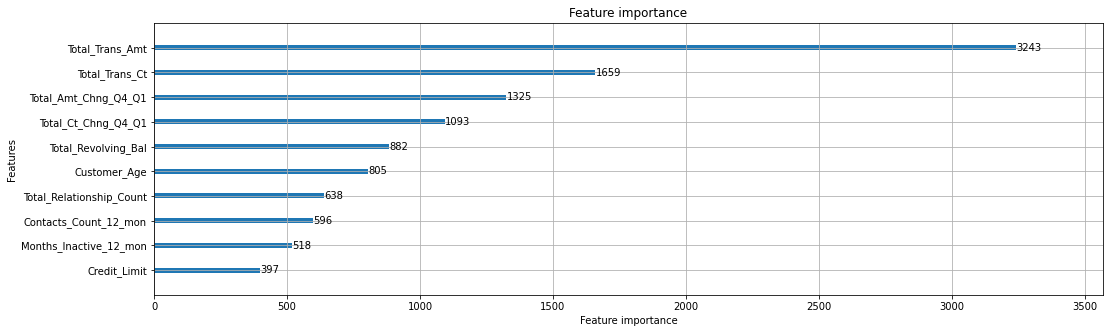

In [ ]:
import lightgbm

ax = lightgbm.plot_importance(best_model_random[-1], max_num_features=10, figsize=(17,5))
plt.show()

Abaixo, temos a Curva ROC, que e utilizada para o computo da AUC score. A medida que a curva se aproxima do ponto 1 no eixo y (True Positive Rate), o modelo esta melhor.

In [ ]:
from yellowbrick.classifier import ROCAUC

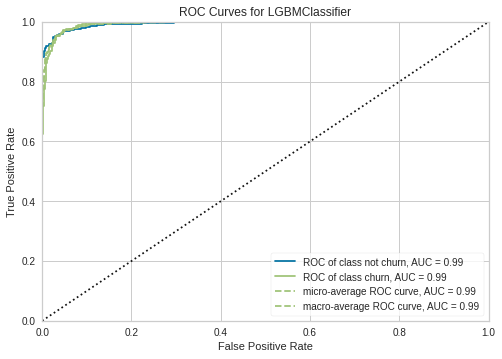

In [ ]:
visualizer = ROCAUC(best_model_random, classes=["not churn", "churn"])

visualizer.fit(X, y)        
visualizer.score(X_test, y_test)        
visualizer.show()  

Neste grafico, conseguimos avaliar o ganho adquirido. A curva verde refere-se aos churns (1), e a azul sao os clientes que permaneceram no banco (0). A ideia elementar deste grafico e poder verificar o ganho associado ao se atingir parte dos clientes. Assim, se atuarmos em 20% da nossa base, conseguiremos atingir cerca de 98% des todos os exemplos positivos.

In [ ]:
!pip install scikit-plot

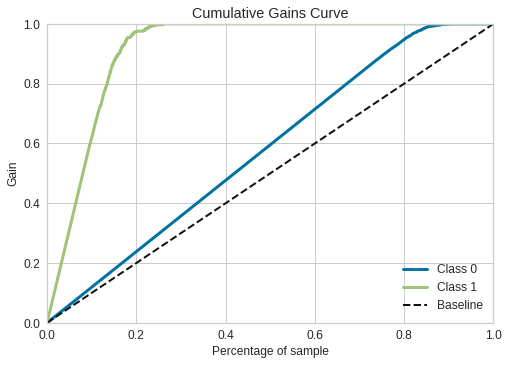

In [ ]:
import scikitplot as skplt

y_prob = best_model_random.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, y_prob);